In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

等差坐标系，和半对数坐标系

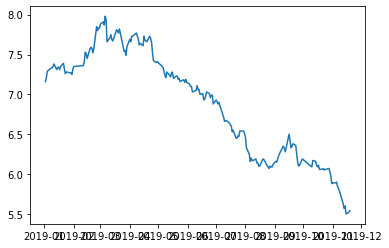

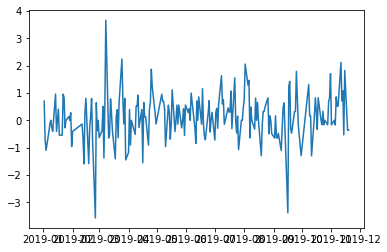

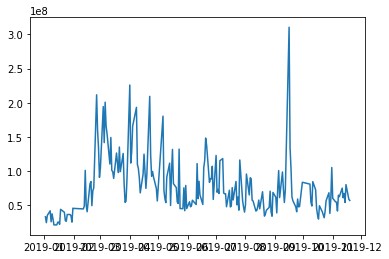

In [30]:
data = pd.read_csv('data/ashare/601857.csv', encoding='GBK', usecols = [0, 3, 7, 11], converters={
    0:lambda x:datetime.strptime(x, '%Y-%m-%d')
})
# print(data)
data = data.sort_index(ascending=False)

data = data.loc[lambda x:x['日期']>datetime(2019,1,1)]

timeline = data.iloc[:,0].values
volume_set = data.iloc[:,3].values

price_linear_set = data.iloc[:,1].values

price_semilog_set = [ (i[2]-i[1])*100/i[1] for i in data.values ]

plt.plot(timeline, price_linear_set, )
plt.show()

plt.plot(timeline, price_semilog_set, )
plt.show()

plt.plot(timeline, volume_set, )
plt.show()

多只同图

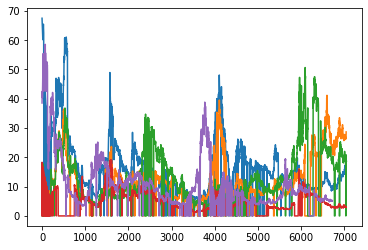

In [35]:
def load_data(code, time_limite=None):
    data = pd.read_csv(f'data/ashare/{code}.csv', encoding='utf8', usecols = [0, 3, 7, 11], converters={
    0:lambda x:datetime.strptime(x, '%Y-%m-%d')
    })
    # print(data)
    data = data.sort_index(ascending=False)
    if time_limite:
        data = data.loc[lambda x:x['日期']>time_limite]
    return data

datas = [load_data(i).iloc[:, 1] for i in ['000001', '000002', '000004', '000005', '000006']]

for data in datas:
    plt.plot(data)
plt.show()